In [1]:
!pip install tensorflow

In [46]:
from tensorflow.keras.datasets import mnist
import numpy as np
import seaborn as sns
 

In [47]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

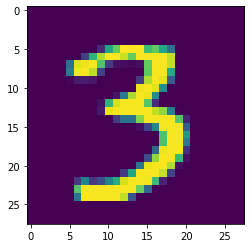

In [51]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10000])

In [52]:
y_train[100]

5

In [53]:
from keras import layers, models
from keras import datasets
from keras.utils import np_utils

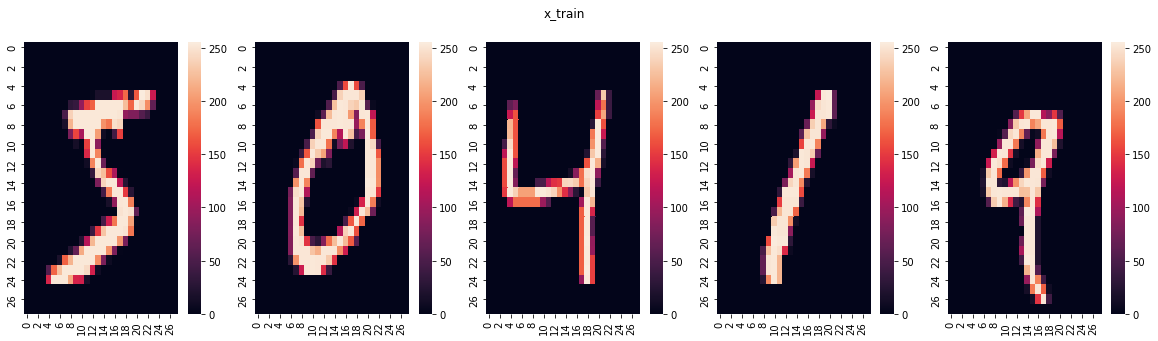

In [54]:
fig, axes = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('x_train')
for i in range(0,5):
  sns.heatmap(ax = axes[i],data=x_train[i])
fig.show()

In [55]:
import cv2 
import matplotlib.image as mpimg
  

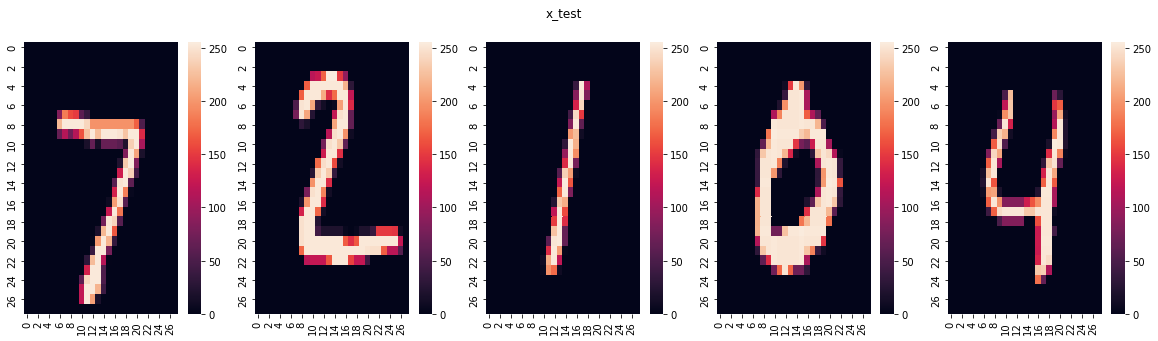

In [56]:
fig, axes = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('x_test')
for i in range(0,5):
  sns.heatmap(ax = axes[i],data=x_test[i])
fig.show()

In [57]:
y_train[:5], y_test[:5]

(array([5, 0, 4, 1, 9], dtype=uint8), array([7, 2, 1, 0, 4], dtype=uint8))

In [58]:
np_utils.to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [59]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [60]:
x_train.shape

(60000, 28, 28)

In [73]:
# lets make it 1D
L,W,H = x_train.shape
x_train = x_train.reshape(-1,W*H)
x_test = x_test.reshape(-1,W*H)

In [74]:
x_test.shape

(10000, 784)

In [75]:
x_train.shape

(60000, 784)

In [76]:
x_train = x_train/255
x_test = x_test/255

In [77]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
# ANN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [79]:
model = Sequential() # Defining the model

#filter that is used to extract the features from the images
#to perform hierarchical feature learning; which is how our brains are thought to identify objects
## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3)))#, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu')) # ReLU piecewise linear function 
#that will output the input directly if it is positive, otherwise, it will output zero

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [80]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7eff0ae88f50>>

In [81]:
model.save('image')

INFO:tensorflow:Assets written to: image/assets


In [82]:
model.metrics_names

['loss', 'accuracy']

In [83]:
model.fit(x_train,y_train,verbose=1,epochs=5)


Epoch 1/5


ValueError: ignored

In [84]:
x = layers.Input(shape= (784,))
h = layers.Activation('relu')(layers.Dense(100)(x))
y = layers.Activation('softmax')(layers.Dense(10)(h))
model = models.Model(x,y)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [85]:
hand = model.fit(x_train,y_train,epochs=5,verbose=1)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2437 - accuracy: 0.6831
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4014 - accuracy: 0.8910
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3537 - accuracy: 0.9010
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3270 - accuracy: 0.9065


In [86]:
hand_test = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3053 - accuracy: 0.9131


In [87]:
hand_test[0] # loss 

0.30528947710990906

In [88]:
hand_test[1] # accuaracy

0.913100004196167

In [95]:
prediction = model.predict(x_test)
prediction

array([[3.89121924e-05, 2.02726497e-07, 4.26816550e-05, ...,
        9.96478975e-01, 1.05746103e-05, 2.84064724e-03],
       [2.19761883e-03, 1.53236484e-04, 9.66719627e-01, ...,
        9.14488041e-09, 3.05897300e-03, 1.02227368e-07],
       [7.63569824e-06, 9.72422421e-01, 1.21969040e-02, ...,
        4.87151090e-03, 2.85005290e-03, 1.04241201e-03],
       ...,
       [1.09172993e-06, 4.89790591e-06, 4.83725125e-05, ...,
        1.28426345e-03, 1.27364900e-02, 1.50885627e-01],
       [1.79535896e-03, 2.50895770e-04, 2.30918769e-04, ...,
        4.78684524e-05, 1.74887568e-01, 4.21530334e-04],
       [1.04049475e-04, 5.71969250e-10, 2.86029797e-04, ...,
        1.26808364e-09, 3.41251621e-06, 9.10671474e-07]], dtype=float32)

In [92]:
import pandas as pd

In [93]:
pred = pd.DataFrame(prediction[:5])
pred 

,0,1,2,3,4,5,6,7,8,9
0,0.000039,2.027265e-07,0.000043,0.000558,4.000463e-06,0.000027,1.085758e-08,9.964790e-01,0.000011,2.840647e-03
1,0.002198,1.532365e-04,0.966720,0.008262,2.576720e-07,0.005033,1.457463e-02,9.144880e-09,0.003059,1.022274e-07
2,0.000008,9.724224e-01,0.012197,0.003068,4.217867e-04,0.001816,1.303298e-03,4.871511e-03,0.002850,1.042412e-03
3,0.998745,2.032109e-10,0.000153,0.000033,5.556568e-07,0.000781,1.317481e-04,5.557050e-05,0.000038,6.133708e-05
4,0.000836,8.195635e-06,0.009553,0.000163,8.735344e-01,0.002496,4.789640e-03,1.315115e-02,0.004121,9.134746e-02


In [94]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

pred.T.style.apply(highlight_max)

,0,1,2,3,4
0,0.000039,0.002198,0.000008,0.998745,0.000836
1,0.000000,0.000153,0.972422,0.000000,0.000008
2,0.000043,0.966720,0.012197,0.000153,0.009553
3,0.000558,0.008262,0.003068,0.000033,0.000163
4,0.000004,0.000000,0.000422,0.000001,0.873534
5,0.000027,0.005033,0.001816,0.000781,0.002496
6,0.000000,0.014575,0.001303,0.000132,0.004790
7,0.996479,0.000000,0.004872,0.000056,0.013151
8,0.000011,0.003059,0.002850,0.000038,0.004121
9,0.002841,0.000000,0.001042,0.000061,0.091347
